<a href="https://colab.research.google.com/github/BrightToughson/SMS-Spam-Detection---Group-9/blob/main/SMS_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/sms+spam+collection/SMSSpamCollection.csv')

In [ ]:
df.sample(5)

,label,message
2179,ham,"I don,t think so. You don't need to be going o..."
3867,ham,"Theoretically yeah, he could be able to come"
225,spam,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA..."
330,ham,I'm reading the text i just sent you. Its mean...
5469,spam,Get your garden ready for summer with a FREE s...


In [ ]:
df.shape

(5574, 2)

In [ ]:
# 1. Data Cleaning
# 2. Exporatory Data Analysis
# 3. Text Preprocessing
# 4. Mobel Building
# 5. Evaluation
# 6. Improvement
# 7. streamlit
# 8. Deployment

***1. Data Cleaning***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5574 non-null   object
 1   message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['label'] = encoder.fit_transform(df['label'])

In [ ]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# missing valuse
df.isnull().sum()

,0
label,0
message,0


In [ ]:
# check for duplicate values
df.duplicated().sum()

np.int64(414)

In [ ]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(5160, 2)

***EDA***

In [ ]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['label'].value_counts()

,count
label,
0,4518
1,642


([<matplotlib.patches.Wedge at 0x7e1de4d08290>,
 [Text(-1.017034638542128, 0.41909491049818676, 'ham'),
  Text(1.0170347751005293, -0.41909457910621567, 'spam')],
 [Text(-0.5547461664775243, 0.22859722390810183, '87.56'),
  Text(0.554746240963925, -0.22859704314884488, '12.44')])

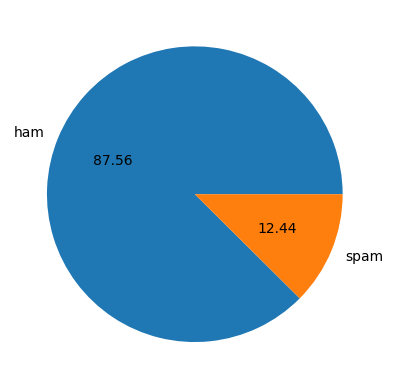

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")

In [ ]:
# Data is imbalanced
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['num_characters'] = df['message'].apply(len)

In [ ]:
df.head()

,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
nltk.download('punkt_tab')
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
df.head()

,label,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
